In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import pylab
import random

import os

In [2]:
plt.rc('axes', labelsize=22)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [3]:
#A partir de aquí python sabe en que carpeta se encuentran los datos
os.chdir("/home/csarmiento/Documentos/PostDoc_docs/Lago_Work/")
os.getcwd()

'/home/csarmiento/Documentos/PostDoc_docs/Lago_Work'

### Calculo del flujo

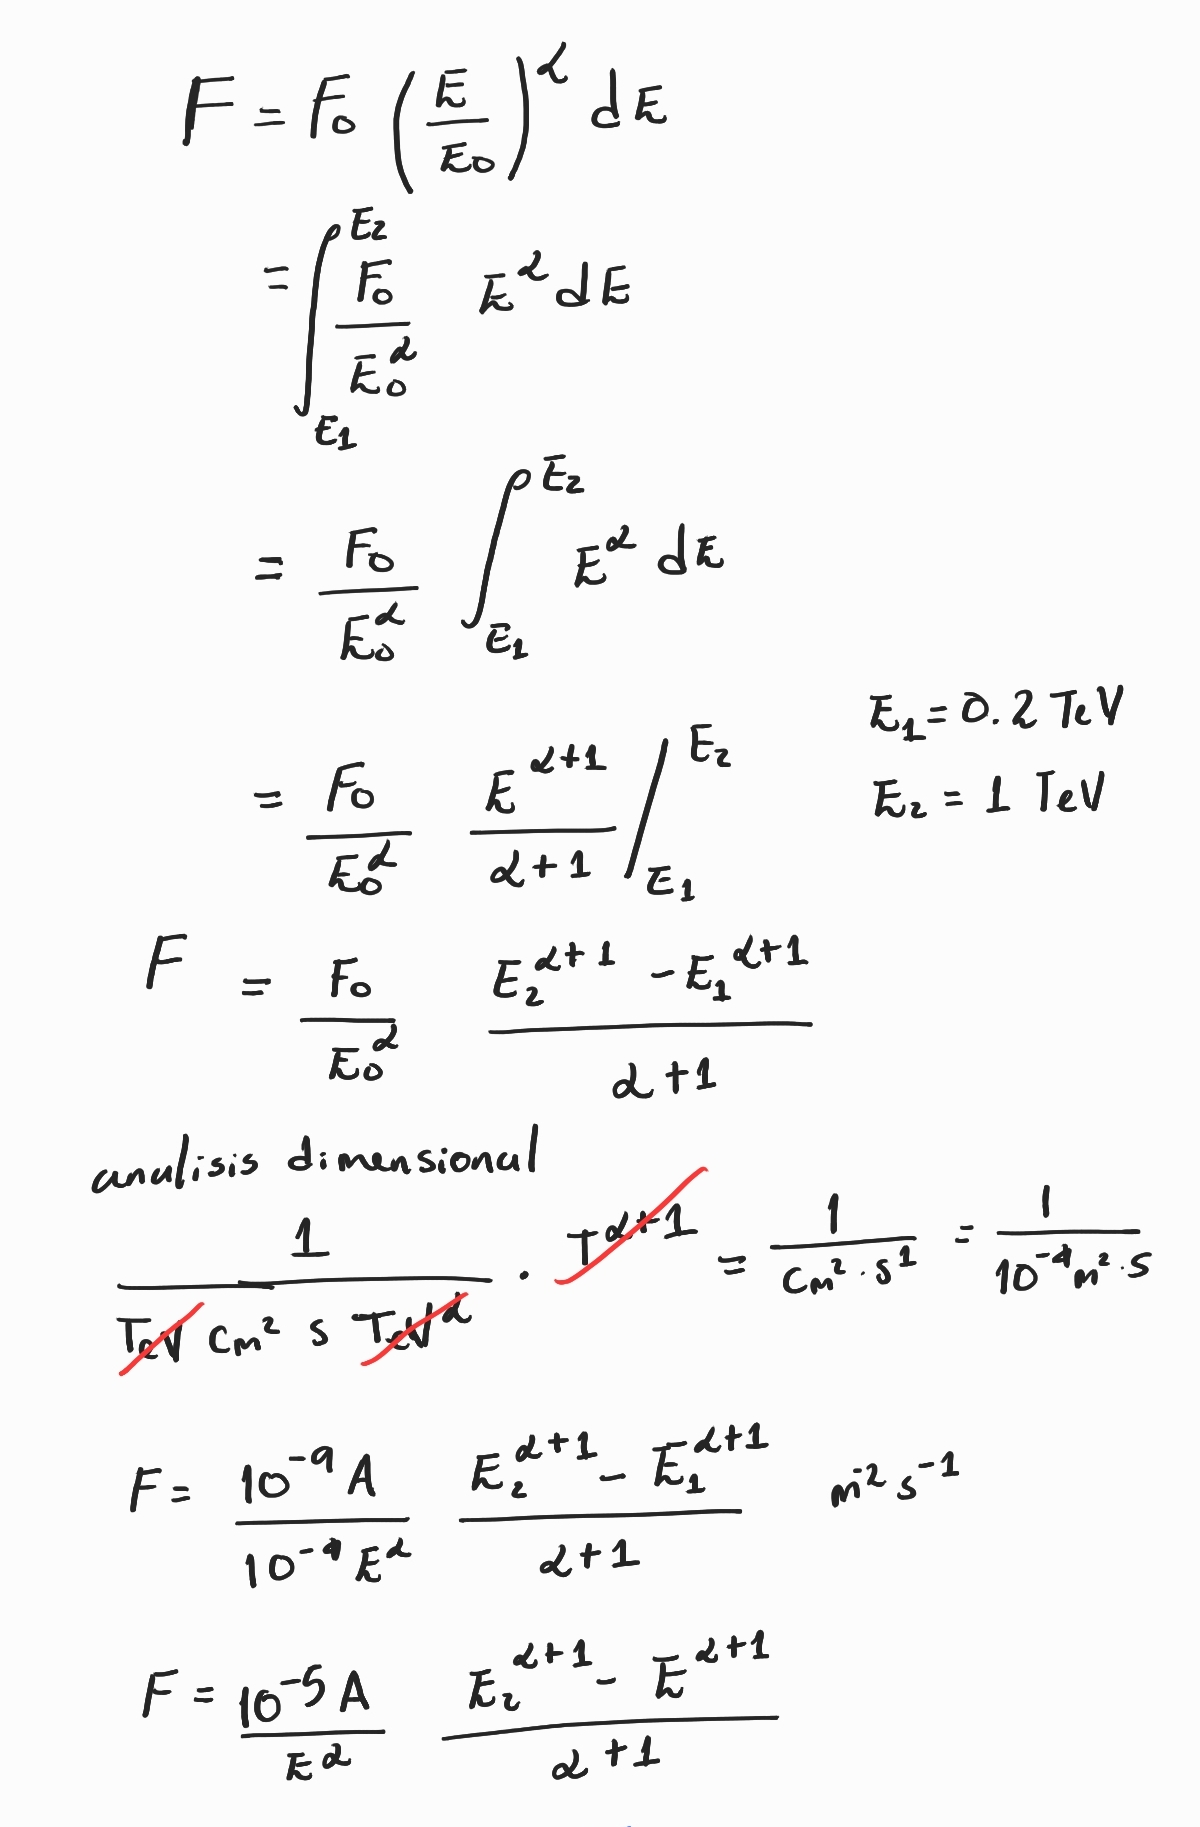

In [18]:
alfa_1=-2.37
A_1=7.5
Er_1=0.47

alfa_2=-2.7
A_2=5.5
Er_2=0.48

alfa_3=-3.37
A_3=2.75
Er_3=0.48

alfa_4=-5.43
A_4=0.409
Er_4=0.475

In [19]:
A=1E-5*A_1/(Er_2**alfa_2)
print(A)

1.0337430537091583e-05


In [20]:
E2=1**(alfa_2+1)
print(E2)

1.0


In [21]:
E1=0.2**(alfa_2+1)
print(E1)

15.425846568000244


In [22]:
A*(E2-E1)/(alfa_2+1)

8.77212863737903e-05

In [38]:
F1=A_1*1E-5*(10**(alfa_1+1)-0.2**(alfa_1+1))/((alfa_1+1)*(Er_1**alfa_1))
F2=A_2*1E-5*(10**(alfa_2+1)-0.2**(alfa_2+1))/((alfa_2+1)*(Er_2**alfa_2))
F3=A_3*1E-5*(10**(alfa_3+1)-0.2**(alfa_3+1))/((alfa_3+1)*(Er_3**alfa_3))
F4=A_4*1E-5*(10**(alfa_4+1)-0.2**(alfa_4+1))/((alfa_4+1)*(Er_4**alfa_4))

In [43]:
print(r"flujo para alfa = -2.37 =", F1, "particulas/m2*s")
print(r"flujo para alfa = -2.70 =", F2, "particulas/m2*s")
print(r"flujo para alfa = -3.37 =", F3, "particulas/m2*s")
print(r"flujo para alfa = -5.43 =", F4, "particulas/m2*s")

flujo para alfa = -2.37 = 8.255702792638225e-05 particulas/m2*s
flujo para alfa = -2.70 = 6.869925269347517e-05 particulas/m2*s
flujo para alfa = -3.37 = 4.434915740109312e-05 particulas/m2*s
flujo para alfa = -5.43 = 2.023964954624724e-05 particulas/m2*s


In [44]:
F1*406387313.6

33550.12879780267

## GRB para $\alpha$ = -2.37

### Simulaciones

- 10.000 fotones
- Energía 0.1 TeV - 2TeV
- h = 5200 m s.n.m
- $\gamma$ = -2.37
- $\theta$ = 0$^{\circ}$
- $\phi$ = -180$^{\circ}$ - 180$^{\circ}$

In [7]:
def grb_rdn(dfr, k):
    dfr=pd.DataFrame()
    r=np.linspace(0,9999,10000).tolist()
    g=random.sample(r, k)
    aux1 = ds[ds["shower_id"]==g[1]]
    aux2 = ds[ds["shower_id"]==g[2]]
    aux3 = ds[ds["shower_id"]==g[3]]
    aux4 = ds[ds["shower_id"]==g[4]]
    aux5 = ds[ds["shower_id"]==g[5]]
    aux6 = ds[ds["shower_id"]==g[6]]
    aux7 = ds[ds["shower_id"]==g[7]]
    aux8 = ds[ds["shower_id"]==g[8]]
    aux9 = ds[ds["shower_id"]==g[9]]
    aux10 = ds[ds["shower_id"]==g[0]]
    dfr=dfr.append([aux1, aux2, aux3, aux4, aux5, aux6, aux9, aux8, aux9, aux10])
    return(dfr)

In [16]:
df1= pd.read_csv(r"GRB_CHA_237/100000.pri.bz2", compression='bz2', delimiter=" ")
df1.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
0,1,270.825,-22.2629,0.0,0.0,451.0,33.0,0.0,0.0,484.0
1,1,665.505,-40.1233,0.0,0.0,1375.0,134.0,0.0,0.0,1509.0
2,1,229.083,-17.8689,0.0,0.0,612.0,52.0,0.0,0.0,664.0
3,1,217.060,-14.4445,0.0,0.0,953.0,100.0,1.0,0.0,1054.0
4,1,345.419,-49.7737,0.0,0.0,684.0,51.0,0.0,1.0,736.0


In [17]:
df2= pd.read_csv(r"GRB_CHA_270/100000.pri.bz2", compression='bz2', delimiter=" ")
df2.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
0,1,211.946,-38.4747,0.0,0.0,301.0,30.0,0.0,0.0,331.0
1,1,442.060,-29.4564,0.0,0.0,844.0,71.0,0.0,0.0,915.0
2,1,434.922,-46.6134,0.0,0.0,715.0,72.0,0.0,0.0,787.0
3,1,342.175,-41.5627,0.0,0.0,1120.0,117.0,0.0,0.0,1237.0
4,1,204.682,-28.6245,0.0,0.0,378.0,30.0,0.0,0.0,408.0


In [18]:
df3= pd.read_csv(r"GRB_CHA_337/100000.pri.bz2", compression='bz2', delimiter=" ")
df3.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
0,1,219.188,-41.0295,0.0,0.0,776.0,81.0,0.0,0.0,857.0
1,1,419.053,-23.4250,0.0,0.0,1445.0,141.0,1.0,0.0,1587.0
2,1,392.077,-13.9186,0.0,0.0,2538.0,274.0,0.0,0.0,2812.0
3,1,220.581,-20.8192,0.0,0.0,545.0,64.0,0.0,0.0,609.0
4,1,211.868,-22.6416,0.0,0.0,719.0,65.0,0.0,0.0,784.0


In [19]:
df4= pd.read_csv(r"GRB_CHA_543/100000.pri.bz2", compression='bz2', delimiter=" ")
df4.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
0,1,222.940,-17.3583,0.0,0.0,636.0,49.0,0.0,0.0,685.0
1,1,297.038,-21.2532,0.0,0.0,742.0,74.0,0.0,0.0,816.0
2,1,432.204,-28.7349,0.0,0.0,1666.0,191.0,1.0,0.0,1858.0
3,1,224.699,-18.5446,0.0,0.0,754.0,60.0,0.0,0.0,814.0
4,1,255.579,-33.5111,0.0,0.0,408.0,28.0,0.0,0.0,436.0


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   prm_Crk_id   10000 non-null  int64  
 1   prm_energy   10000 non-null  float64
 2   prm_x0       10000 non-null  float64
 3   prm_theta    10000 non-null  float64
 4   prm_phi      10000 non-null  float64
 5   ph_obs_lev   10000 non-null  float64
 6   el_obs_lev   10000 non-null  float64
 7   hd_obs_lev   10000 non-null  float64
 8   mu_obs_lev   10000 non-null  float64
 9   tot_obs_lev  10000 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 781.4 KB


### Distribución de energía de los primarios

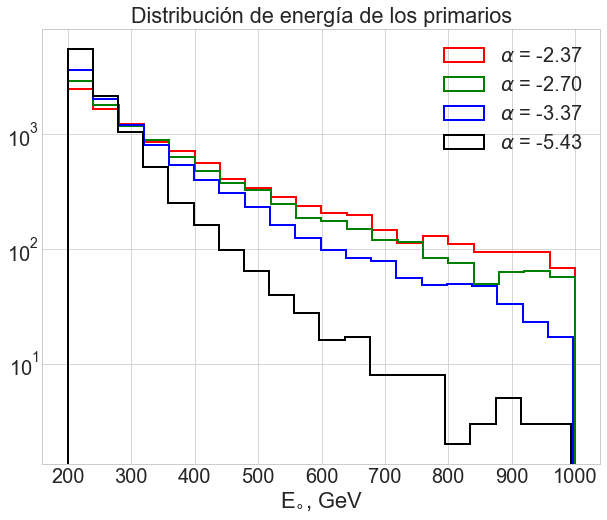

In [29]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))
plt.hist(df1["prm_energy"], bins=20, histtype='step', color="r", linewidth=2, fill=False, label=r"$\alpha$ = -2.37");
plt.hist(df2["prm_energy"], bins=20, histtype='step', color="g", linewidth=2, fill=False, label=r"$\alpha$ = -2.70");
plt.hist(df3["prm_energy"], bins=20, histtype='step', color="b", linewidth=2, fill=False, label=r"$\alpha$ = -3.37");
plt.hist(df4["prm_energy"], bins=20, histtype='step', color="k", linewidth=2, fill=False, label=r"$\alpha$ = -5.43");
pyplot.yscale('log')
plt.title("Distribución de energía de los primarios")
plt.xlabel(r"E$_{\circ}$, GeV")
plt.legend(fontsize=20)
plt.show()

### Distribución del punto de primera interacción

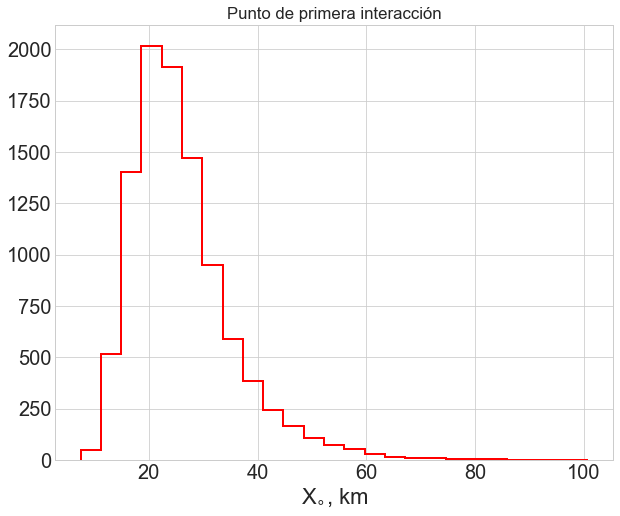

In [36]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,8))
plt.hist(-df["prm_x0"], bins=25, histtype='step', color="r", linewidth=2, fill=False);
plt.title("Punto de primera interacción")
plt.xlabel(r"X$_{\circ}$, km")
plt.show()

In [27]:
df1_xo=df1[(-df1["prm_x0"]<20)]
df2_xo=df2[(-df2["prm_x0"]<20)]
df3_xo=df3[(-df3["prm_x0"]<20)]
df4_xo=df4[(-df4["prm_x0"]<20)]

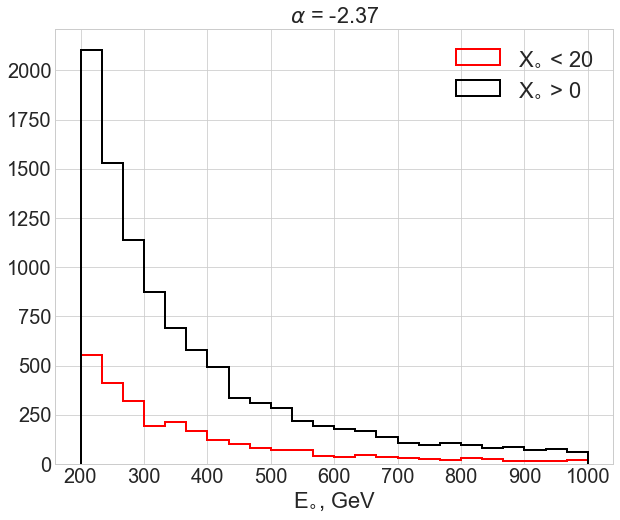

In [31]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))
bins = np.linspace(200, 1000, 25)

plt.hist(df1_xo["prm_energy"], bins, histtype='step', color="r", linewidth=2, fill=False, label=r"X$_{\circ}$ < 20");
plt.hist(df1["prm_energy"], bins, histtype='step', color="k", linewidth=2, fill=False, label=r"X$_{\circ}$ > 0");
plt.xlabel(r"E$_{\circ}$, GeV")
plt.title(r"$\alpha$ = -2.37")
plt.legend(fontsize=22)
plt.show()

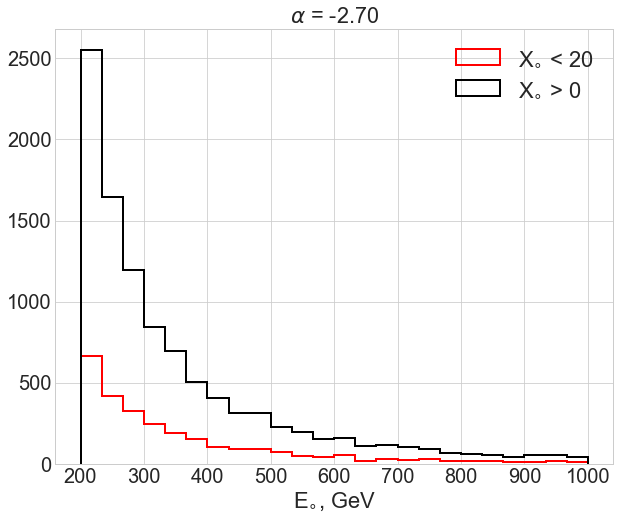

In [32]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))
bins = np.linspace(200, 1000, 25)

plt.hist(df2_xo["prm_energy"], bins, histtype='step', color="r", linewidth=2, fill=False, label=r"X$_{\circ}$ < 20");
plt.hist(df2["prm_energy"], bins, histtype='step', color="k", linewidth=2, fill=False, label=r"X$_{\circ}$ > 0");
plt.xlabel(r"E$_{\circ}$, GeV")
plt.title(r"$\alpha$ = -2.70")
plt.legend(fontsize=22)
plt.show()

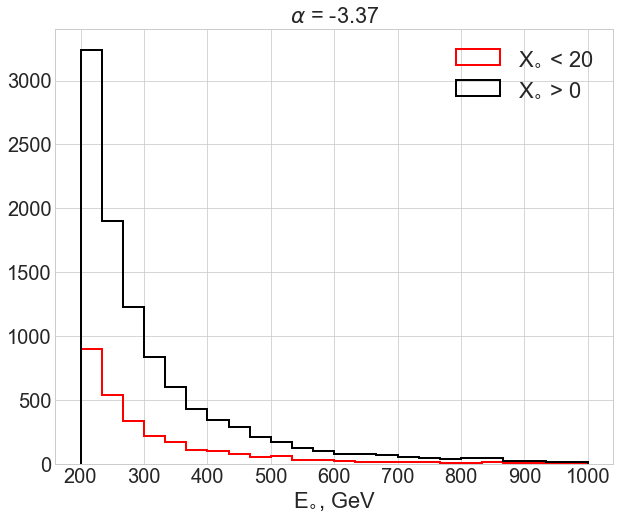

In [33]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))
bins = np.linspace(200, 1000, 25)

plt.hist(df3_xo["prm_energy"], bins, histtype='step', color="r", linewidth=2, fill=False, label=r"X$_{\circ}$ < 20");
plt.hist(df3["prm_energy"], bins, histtype='step', color="k", linewidth=2, fill=False, label=r"X$_{\circ}$ > 0");
plt.xlabel(r"E$_{\circ}$, GeV")
plt.title(r"$\alpha$ = -3.37")
plt.legend(fontsize=22)
plt.show()

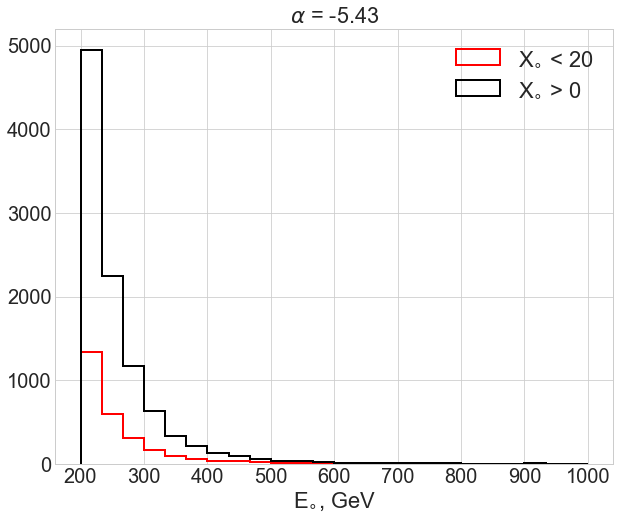

In [34]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10,8))
bins = np.linspace(200, 1000, 25)

plt.hist(df4_xo["prm_energy"], bins, histtype='step', color="r", linewidth=2, fill=False, label=r"X$_{\circ}$ < 20");
plt.hist(df4["prm_energy"], bins, histtype='step', color="k", linewidth=2, fill=False, label=r"X$_{\circ}$ > 0");
plt.xlabel(r"E$_{\circ}$, GeV")
plt.title(r"$\alpha$ = -5.43")
plt.legend(fontsize=22)
plt.show()